In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../Datasets/train/steam_ds.csv")

In [ ]:
df.head()

In [ ]:
df_sent_group = df.groupby("user_suggestion").agg("count")[['user_review']]

In [ ]:
df_sent_group.reset_index(inplace=True)

In [ ]:
df_sent_group.head()

In [ ]:
#sns.histplot(data=df, x="user_suggestion")

g_ = sns.barplot(x="user_suggestion", y="user_review", data=df_sent_group)
g_.set(xlabel='Sentiments', ylabel='Reviews')
g_.set_xticklabels(labels=df_sent_group["user_suggestion"].unique())
fig = g_.get_figure()
fig.savefig("sentiment_Distributions.pdf")
# Show the plot
plt.show()

In [ ]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
 
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)
 
# Add some extra words ad hoc for our purpose
app_words = ['app', 'apps', 'application', 'game']
stopwords.update(app_words)

In [ ]:
# join all reviews
text_neg = " ".join(review for review in df.user_review[df.user_suggestion == "Negative"])
 
# Generate the image
wordcloud_neg = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text_neg)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
#plt.title('Total Reviews Word Clowd')
#fig = plt.get_figure()
fig.savefig("sentimentsWordCloudNeg.pdf")
plt.show()


In [ ]:
# join all reviews
text_pos = " ".join(review for review in df.user_review[df.user_suggestion == "Positive"])
 
# Generate the image
wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text_pos)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
#plt.title('Total Reviews Word Clowd')
#fig = plt.get_figure()
fig.savefig("sentimentsWordCloudPos.pdf")
plt.show()

In [2]:
df_emotions = pd.read_csv("../Datasets/train/text_emotion_updated.csv")

In [3]:
df_emotions.head()

,Unnamed: 0,text,emotions
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,happiness
4,4,i am feeling grouchy,anger


In [4]:
df_emotions["emotions"].unique()

array(['sadness', 'anger', 'happiness', 'surprise', 'fear', 'boredom',
       'neutral'], dtype=object)

In [5]:
df_group = df_emotions.groupby("emotions").agg("count")[['text']]

In [6]:
df_group.reset_index(inplace=True)

In [7]:
df_group.head()

,emotions,text
0,anger,3867
1,boredom,1006
2,fear,10608
3,happiness,20660
4,neutral,8638


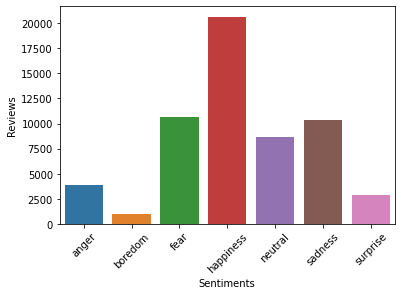

In [8]:
#sns.histplot(data=df_emotions, x="emotions")

g = sns.barplot(x="emotions", y="text", data=df_group)
g.set(xlabel='Sentiments', ylabel='Reviews')
g.set_xticklabels(labels=df_group["emotions"].unique(), rotation=45)
fig = g.get_figure()
fig.savefig("emotions_Distributions.pdf")
# Show the plot
plt.show()

In [ ]:
# join all reviews
text = " ".join(review for review in df_emotions.text)
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title('Total Reviews Word Clowd')
#fig = plt.get_figure()
fig.savefig("wordCloudEmotions.pdf")
plt.show()